In [41]:
import numpy as n
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
%matplotlib notebook

In [73]:
#brown dwarf spectrum
model_dir = '/Users/zen/data/models/sonora_diamondback/spectra/t1000g100f1_m0.0_co1.0.spec'
gas_giant_data = n.genfromtxt(model_dir, skip_header = 3)
gas_giant_lam = gas_giant_data[:,0]  #wavelength (microns)
gas_giant_flux = gas_giant_data[:,1] #(W/m^2/m)

L = n.where( (gas_giant_lam > 0) & (gas_giant_lam < 14))
lam_clip, flux_clip = gas_giant_lam[L], gas_giant_flux[L]

<IPython.core.display.Javascript object>


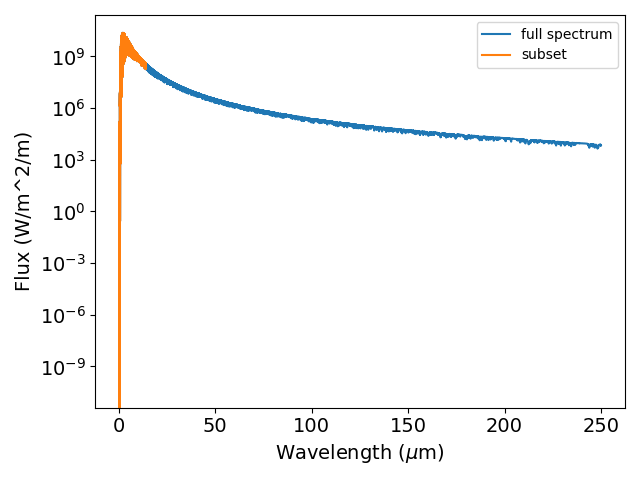

In [74]:
ticksize = 14
labelsize = 14
plt.figure('Full Spectrum')
plt.plot(gas_giant_lam, gas_giant_flux, label = 'full spectrum')
plt.plot(gas_giant_lam[L], gas_giant_flux[L], label = 'subset')
plt.yscale('log')
#plt.xscale('log')
plt.xticks(size = ticksize)
plt.yticks(size = ticksize)
plt.ylabel('Flux (W/m^2/m)', size = labelsize)
plt.xlabel('Wavelength ($\mu$m)', size = labelsize)
plt.tight_layout()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


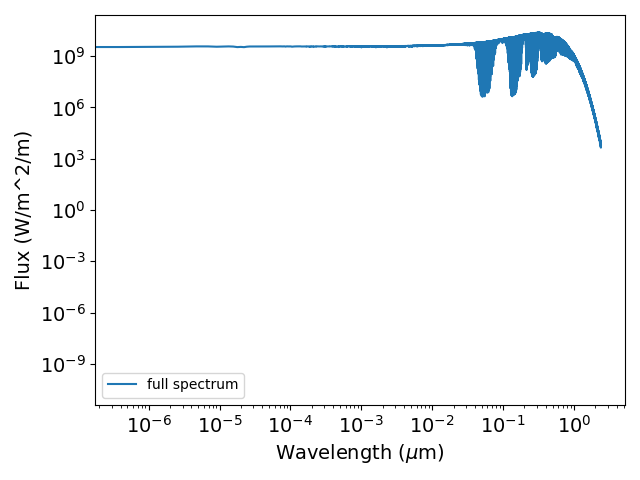

In [75]:
plt.figure('Full Spectrum  LogLog')
plt.plot(n.log10(gas_giant_lam), gas_giant_flux, label = 'full spectrum')
#plt.plot(gas_giant_lam[L], gas_giant_flux[L], label = 'subset')
plt.yscale('log')
plt.xscale('log')
plt.xticks(size = ticksize)
plt.yticks(size = ticksize)
plt.ylabel('Flux (W/m^2/m)', size = labelsize)
plt.xlabel('Wavelength ($\mu$m)', size = labelsize)
plt.tight_layout()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


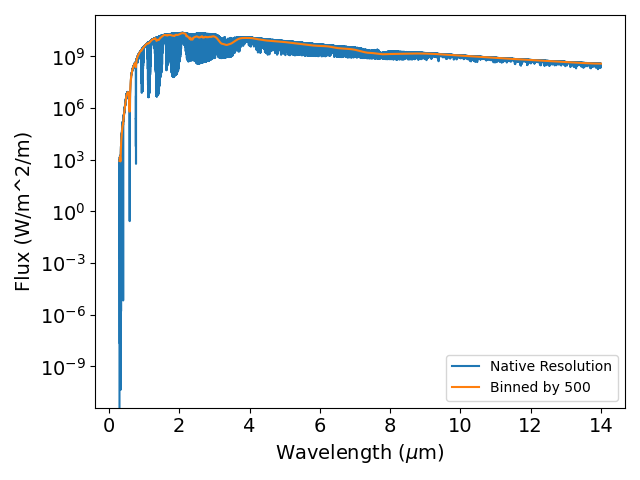

In [76]:
ticksize = 14
labelsize = 14

sigma1 = 500
#sigma2 = 100
flux_clip_convolve1 = gaussian_filter1d(flux_clip,sigma1)
flux_clip_convolve2 = gaussian_filter1d(flux_clip,sigma2)

plt.figure('L region Spectrum')
plt.plot(lam_clip, flux_clip, label = 'Native Resolution')
plt.plot(lam_clip, flux_clip_convolve1, label = 'Binned by 500')
#plt.plot(lam_clip, flux_clip_convolve2, label = 'Binned bt 100')
plt.legend()
plt.yscale('log')
plt.xticks(size = ticksize)
plt.yticks(size = ticksize)
plt.ylabel('Flux (W/m^2/m)', size = labelsize)
plt.xlabel('Wavelength ($\mu$m)', size = labelsize)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


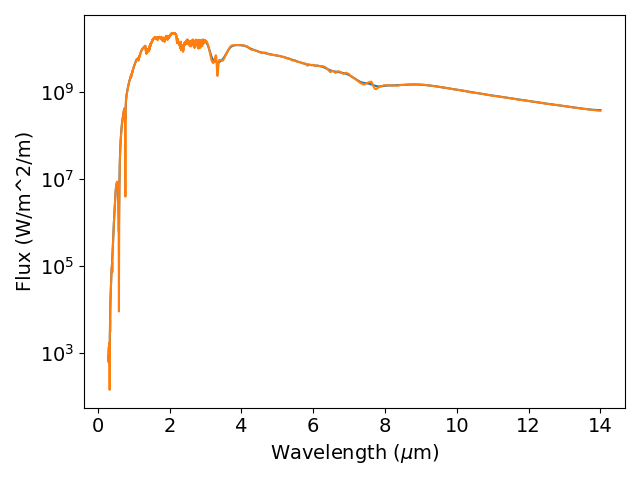

In [77]:
plt.figure('L region Spectrum 2')
#plt.plot(lam_clip, flux_clip, label = 'subset')
plt.plot(lam_clip, flux_clip_convolve1, label = 'subset')
plt.plot(lam_clip, flux_clip_convolve2, label = 'subset')

plt.yscale('log')
plt.xticks(size = ticksize)
plt.yticks(size = ticksize)
plt.ylabel('Flux (W/m^2/m)', size = labelsize)
plt.xlabel('Wavelength ($\mu$m)', size = labelsize)
plt.tight_layout()
plt.show()

In [79]:
n.mean(R_model)

29999.99999999826

<IPython.core.display.Javascript object>


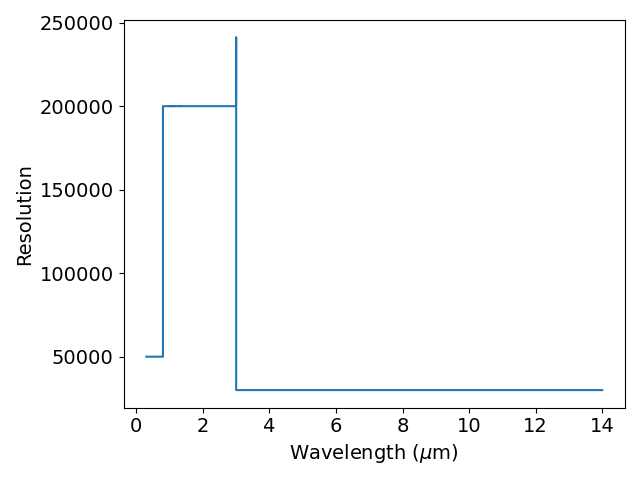

In [80]:
R_model = lam_clip[1:]/abs(n.diff(lam_clip))
plt.figure('Resolution')
#plt.plot(lam_clip, flux_clip, label = 'subset')
plt.plot(lam_clip[1:], R_model, label = 'Resoltuion')
plt.xticks(size = ticksize)
plt.yticks(size = ticksize)
plt.ylabel('Resolution', size = labelsize)
plt.xlabel('Wavelength ($\mu$m)', size = labelsize)
plt.tight_layout()
plt.show()

In [69]:
R = 100
lam_min = 1.1
lam_max = 1.40
lam_cen = (lam_max - lam_min)/2

lam_cen_model = n.mean(lam_clip)


dlam = lam_cen/R
dlam_model = lam_cen_model/n.mean(R_model)

print('delta lam instrument')
print(dlam)

print('delta lam model')
print(dlam_model)

print('Ratio')
print(dlam/dlam_model)

delta lam instrument
0.0014999999999999992
delta lam model
0.00013050979744682736
Ratio
11.493389993277194


In [72]:
wavelength_grid = n.arange(lam_min, lam_max, dlam)

array([1.1   , 1.1015, 1.103 , 1.1045, 1.106 , 1.1075, 1.109 , 1.1105,
       1.112 , 1.1135, 1.115 , 1.1165, 1.118 , 1.1195, 1.121 , 1.1225,
       1.124 , 1.1255, 1.127 , 1.1285, 1.13  , 1.1315, 1.133 , 1.1345,
       1.136 , 1.1375, 1.139 , 1.1405, 1.142 , 1.1435, 1.145 , 1.1465,
       1.148 , 1.1495, 1.151 , 1.1525, 1.154 , 1.1555, 1.157 , 1.1585,
       1.16  , 1.1615, 1.163 , 1.1645, 1.166 , 1.1675, 1.169 , 1.1705,
       1.172 , 1.1735, 1.175 , 1.1765, 1.178 , 1.1795, 1.181 , 1.1825,
       1.184 , 1.1855, 1.187 , 1.1885, 1.19  , 1.1915, 1.193 , 1.1945,
       1.196 , 1.1975, 1.199 , 1.2005, 1.202 , 1.2035, 1.205 , 1.2065,
       1.208 , 1.2095, 1.211 , 1.2125, 1.214 , 1.2155, 1.217 , 1.2185,
       1.22  , 1.2215, 1.223 , 1.2245, 1.226 , 1.2275, 1.229 , 1.2305,
       1.232 , 1.2335, 1.235 , 1.2365, 1.238 , 1.2395, 1.241 , 1.2425,
       1.244 , 1.2455, 1.247 , 1.2485, 1.25  , 1.2515, 1.253 , 1.2545,
       1.256 , 1.2575, 1.259 , 1.2605, 1.262 , 1.2635, 1.265 , 1.2665,
      